# 계층적 군집분석
- 여러개의 군집 중에서 가장 유사도가 높은, 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 방법을 말한다. **합체 군집화(agglomerative clustering)**라고도 한다. 가장 처음에는 모든 군집이 하나의 데이터만을 가진다. 따라서 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 된다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv('clustering/gn_total_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 18 non-null     object 
 1   공원                   18 non-null     int64  
 2   경찰서                  18 non-null     int64  
 3   경찰공무원 1명당 담당 주민수     18 non-null     float64
 4   고령화예산                18 non-null     float64
 5   노인복지사업예산비중           18 non-null     float64
 6   노인 1인당 노인복지 예산 (천원)  18 non-null     object 
 7   단독주택                 18 non-null     float64
 8   아파트                  18 non-null     float64
 9   연립주택                 18 non-null     float64
 10  다세대주택                18 non-null     float64
 11  거주_기타                18 non-null     float64
 12  100만원미만              18 non-null     float64
 13  100~200              18 non-null     float64
 14  200~300              18 non-null     float64
 15  300~400              18 non-null     float

In [4]:
df.columns

Index(['city', '공원', '경찰서', '경찰공무원 1명당 담당 주민수', '고령화예산', '노인복지사업예산비중',
       '노인 1인당 노인복지 예산 (천원)', '단독주택', '아파트', '연립주택', '다세대주택', '거주_기타',
       '100만원미만', '100~200', '200~300', '300~400', '400~500', '500~600',
       '600~700', '700만원 이상', 'silver_hall', 'jobforpay', 'ratio_old',
       'stress', 'melancholy', 'poor_60', 'infra', 'station'],
      dtype='object')

In [5]:
df = df.iloc[:, 1:]
df

,공원,경찰서,경찰공무원 1명당 담당 주민수,고령화예산,노인복지사업예산비중,노인 1인당 노인복지 예산 (천원),단독주택,아파트,연립주택,다세대주택,...,600~700,700만원 이상,silver_hall,jobforpay,ratio_old,stress,melancholy,poor_60,infra,station
0,6,19,275.634146,42.5,31.4,"2,032",87.6,7.5,2.5,1.5,...,0.8,0.4,1,6781,41.5,12.4,1.0,8781.0,76,350
1,33,8,293.607407,49.3,32.0,"2,074",82.3,9.4,0.3,5.2,...,0.8,1.6,5,5236,35.0,22.1,5.9,6780.5,70,293
2,47,11,408.074534,42.1,40.8,"2,765",78.0,17.5,2.6,1.0,...,0.8,2.3,1,6468,27.2,15.2,2.2,8375.5,73,397
3,27,10,304.405229,45.0,42.0,"2,943",84.4,9.4,3.8,2.0,...,0.8,1.9,4,6114,36.9,10.2,1.7,7917.0,80,308
4,60,11,521.444444,61.0,27.5,"2,296",25.8,63.8,2.6,7.3,...,2.4,2.1,4,10201,21.6,19.7,12.0,13210.5,194,429
5,436,38,620.023739,823.2,44.9,"2,507",34.6,61.3,1.9,0.6,...,2.6,6.6,39,61995,16.3,18.8,5.7,80283.0,"1,429",2167
6,42,8,384.759259,8.2,24.5,"2,121",71.4,15.1,1.9,7.9,...,0.5,2.4,2,7563,33.1,1.3,1.0,9794.5,108,302
7,169,14,666.667946,213.3,29.8,"2,057",52.5,42.0,4.0,1.5,...,2.4,4.2,18,23823,18.2,19.6,5.6,30851.0,573,938
8,31,8,192.680851,40.2,53.7,"3,087",80.5,9.4,8.6,1.1,...,0.8,1.4,0,3893,38.2,14.9,8.9,5041.5,49,308
9,236,12,829.217494,90.7,45.5,"3,042",24.8,72.0,2.5,0.7,...,2.1,2.5,8,20070,15.0,5.0,8.8,25990.0,508,621


In [6]:
df["노인 1인당 노인복지 예산 (천원)"]=pd.to_numeric(df["노인 1인당 노인복지 예산 (천원)"].str.replace(",",""))

In [7]:
df["infra"]=pd.to_numeric(df["infra"].str.replace(",",""))

In [8]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [10]:
df_pca = pca.fit_transform(df_std)
df_pca[:5]

array([[-3.79310142,  2.14333327,  0.77261624],
       [-2.41126982,  1.05081971,  2.73566269],
       [-2.40332287,  0.7593788 , -0.37833674],
       [-2.71687897,  0.45057665, -0.5246814 ],
       [ 1.43427067, -2.02837154,  2.81445486]])

In [11]:
df_pca2 = pd.DataFrame(df)

In [12]:
pca.explained_variance_ratio_

array([0.52139932, 0.15496514, 0.10512805])

In [13]:
sum(pca.explained_variance_ratio_)

0.7814925097687168

In [14]:
df2 = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df2.head()

,PC1,PC2,PC3
0,-3.793101,2.143333,0.772616
1,-2.411270,1.050820,2.735663
2,-2.403323,0.759379,-0.378337
3,-2.716879,0.450577,-0.524681
4,1.434271,-2.028372,2.814455


In [15]:
df2.to_csv('pca.csv')

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(df2, 'ward')
Z

array([[ 2.        ,  3.        ,  0.46378115,  2.        ],
       [ 8.        , 10.        ,  0.80943956,  2.        ],
       [11.        , 17.        ,  1.10906425,  2.        ],
       [15.        , 18.        ,  1.16011063,  3.        ],
       [12.        , 16.        ,  1.25104649,  2.        ],
       [ 1.        ,  6.        ,  1.32356612,  2.        ],
       [13.        , 19.        ,  1.60915963,  3.        ],
       [ 9.        , 14.        ,  1.95462898,  2.        ],
       [21.        , 22.        ,  2.56868841,  5.        ],
       [ 4.        , 20.        ,  3.450428  ,  3.        ],
       [24.        , 26.        ,  3.66469634,  8.        ],
       [ 0.        , 23.        ,  3.72154934,  3.        ],
       [ 7.        , 25.        ,  4.33311456,  3.        ],
       [27.        , 30.        ,  5.3932029 ,  6.        ],
       [28.        , 29.        ,  7.94752123, 11.        ],
       [ 5.        , 31.        , 13.25355068,  7.        ],
       [32.        , 33.

In [17]:
labelList = ['합천군','함양군','함안군','하동군','통영시','창원시','창녕군','진주시','의령군','양산시','산청군','사천시','밀양시','남해군','김해시','고성군','거창군','거제시']

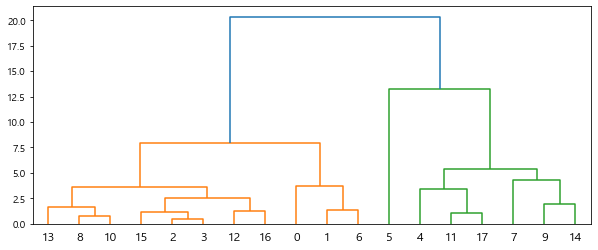

In [18]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

plt.show()

### 군집 6개 기준

### 1: 남해군, 의령군, 산청군 
### 2:  고성군, 함안군, 하동군, 밀양시, 거창군
### 3: 합천군, 함양군, 창녕군
### 4: 창원시
### 5:  통영시, 사천시, 거제시
### 6: 진주시, 양산시, 김해시

## 군집 4개 기준

### 1: 남해군, 의령군, 산청군, 고성군, 함안군, 하동군, 밀양시, 거창군
### 2: 합천군, 함양군, 창녕군
### 3: 창원시
### 4: 통영시, 사천시, 거제시, 진주시, 양산시, 김해시